In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import MinMaxScaler
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
np.random.seed(0)

In [2]:
df1 = pd.read_csv('observedDataset1.csv')

In [3]:
df1.head()

,Unnamed: 0,stationID,Days,observedTempMax,observedTempMin,observedHumidity,observedPressure,observedWind,observedRainfallcatagorical
0,0,10120,1,23.182051,10.735897,77.586207,1016.255172,3.968966,0.0
1,1,10120,2,22.997436,10.738462,78.655172,1016.424138,4.017241,0.0
2,2,10120,3,22.276923,10.566667,80.551724,1016.227586,4.306897,0.0
3,3,10120,4,22.115385,10.712821,79.862069,1016.027586,4.234483,1.0
4,4,10120,5,22.325641,10.274359,79.758621,1015.627586,4.434483,0.0


In [4]:
df1.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
for c in range(12078,12106):
    df1.drop(c,axis=0,inplace=True)
    


    

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

pd.set_option('display.max_colwidth',0) 
#df1.reset_index()
#print(df1)

### Only one station data selection

In [6]:
df = df1.iloc[0:366,:]

In [7]:
#df

In [8]:
df = df.reset_index()
df.shape

(366, 9)

In [9]:
df.columns

Index(['index', 'stationID', 'Days', 'observedTempMax', 'observedTempMin',
       'observedHumidity', 'observedPressure', 'observedWind',
       'observedRainfallcatagorical'],
      dtype='object')

In [10]:
df.drop("index", axis=1, inplace=True)

df.columns

Index(['stationID', 'Days', 'observedTempMax', 'observedTempMin',
       'observedHumidity', 'observedPressure', 'observedWind',
       'observedRainfallcatagorical'],
      dtype='object')

In [11]:
df.columns

Index(['stationID', 'Days', 'observedTempMax', 'observedTempMin',
       'observedHumidity', 'observedPressure', 'observedWind',
       'observedRainfallcatagorical'],
      dtype='object')

In [12]:
df['observedRainfallcatagorical'].value_counts()

1.0    244
0.0    122
Name: observedRainfallcatagorical, dtype: int64

In [13]:
df['observedRainfallcatagorical'].fillna(method='ffill',inplace=True,axis=0)

In [14]:
df['observedRainfallcatagorical'].value_counts()

1.0    244
0.0    122
Name: observedRainfallcatagorical, dtype: int64

In [15]:
df['observedHumidity'].fillna(method='ffill',inplace=True,axis=0)

In [16]:
df['observedPressure'].fillna(method='ffill',inplace=True,axis=0)

In [17]:
df['observedWind'].fillna(method='ffill',inplace=True,axis=0)

In [18]:
df.corr()

,stationID,Days,observedTempMax,observedTempMin,observedHumidity,observedPressure,observedWind,observedRainfallcatagorical
stationID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days,NaN,1.000000,0.135647,0.232854,0.452880,-0.029081,-0.489957,0.025728
observedTempMax,NaN,0.135647,1.000000,0.915483,0.132692,-0.831025,0.438335,0.650666
observedTempMin,NaN,0.232854,0.915483,1.000000,0.494443,-0.922523,0.250930,0.745856
observedHumidity,NaN,0.452880,0.132692,0.494443,1.000000,-0.448527,-0.464762,0.417390
observedPressure,NaN,-0.029081,-0.831025,-0.922523,-0.448527,1.000000,-0.351664,-0.704026
observedWind,NaN,-0.489957,0.438335,0.250930,-0.464762,-0.351664,1.000000,0.242347
observedRainfallcatagorical,NaN,0.025728,0.650666,0.745856,0.417390,-0.704026,0.242347,1.000000


In [19]:
x = df.iloc[:,[2,3,4,6] ] 


In [20]:
y=df.iloc[:, 7:]



In [21]:
#scaler_x = MinMaxScaler()
#scaler_y = MinMaxScaler()
#scaler_x.fit(x)
#x_=scaler_x.transform(x)

#scaler_y.fit(y)
#y_=scaler_y.transform(y)

  
stx= StandardScaler()    
x_= stx.fit_transform(x)    
y_= y 


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_,y_,test_size=0.2,random_state=1)

In [23]:
x_train.shape

(292, 4)

In [24]:
y_train.shape

(292, 1)

In [25]:
yy_test = y_test
y_test.shape

(74, 1)

## Decision trees( Random forest classifier)

In [26]:
yTrain=np.ravel(y_train)
yTest=np.ravel(y_test)

In [27]:
RF = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
h=RF.fit(x_train,yTrain)
y_pred = RF.predict(x_test)

In [28]:
accuracy_score(yTest, y_pred)

0.8783783783783784

In [29]:
RF.feature_importances_

array([0.29369206, 0.47782666, 0.12672482, 0.10175645])

## Gaussian Naive Bayes

In [30]:
nb=GaussianNB()

nb.fit(x_train,yTrain)

y_pred1=nb.predict(x_test)
y_pred1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1.])

In [31]:
metrics.accuracy_score(yTest,y_pred1)

0.9054054054054054

In [32]:
gdf = pd.DataFrame(yy_test)
# Using DataFrame.insert() to add a column
gdf.insert(0, "prediction",y_pred1, True)
gdf.rename(columns = { 0:'Actual value'}, inplace = True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

pd.set_option('display.max_colwidth',0) 

# Observe the result
#print(gdf)

## Artificial neural network

In [33]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising
model = Sequential()

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling 
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train 
history = model.fit(x_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
8/8 [==============================] - 0s 48ms/step - loss: 0.6931 - accuracy: 0.6781 - val_loss: 0.6931 - val_accuracy: 0.5932
Epoch 2/150
8/8 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.6910 - val_loss: 0.6930 - val_accuracy: 0.5932
Epoch 3/150
8/8 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.6910 - val_loss: 0.6930 - val_accuracy: 0.5932
Epoch 4/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.6910 - val_loss: 0.6929 - val_accuracy: 0.5932
Epoch 5/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.6910 - val_loss: 0.6928 - val_accuracy: 0.5932
Epoch 6/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.6910 - val_loss: 0.6928 - val_accuracy: 0.5932
Epoch 7/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.6910 - val_loss: 0.6927 - val_accuracy: 0.5932
Epoch 8/150
8/8 [=========

8/8 [==============================] - 0s 8ms/step - loss: 0.6636 - accuracy: 0.6910 - val_loss: 0.6676 - val_accuracy: 0.5932
Epoch 60/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6614 - accuracy: 0.6910 - val_loss: 0.6660 - val_accuracy: 0.5932
Epoch 61/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6577 - accuracy: 0.6910 - val_loss: 0.6641 - val_accuracy: 0.5932
Epoch 62/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6565 - accuracy: 0.6910 - val_loss: 0.6622 - val_accuracy: 0.5932
Epoch 63/150
8/8 [==============================] - 0s 7ms/step - loss: 0.6558 - accuracy: 0.6910 - val_loss: 0.6601 - val_accuracy: 0.5932
Epoch 64/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.6953 - val_loss: 0.6579 - val_accuracy: 0.5932
Epoch 65/150
8/8 [==============================] - 0s 6ms/step - loss: 0.6478 - accuracy: 0.6867 - val_loss: 0.6557 - val_accuracy: 0.5932
Epoch 66/150
8/8 [===============

8/8 [==============================] - 0s 6ms/step - loss: 0.4506 - accuracy: 0.8069 - val_loss: 0.4546 - val_accuracy: 0.8136
Epoch 118/150
8/8 [==============================] - 0s 5ms/step - loss: 0.4477 - accuracy: 0.8412 - val_loss: 0.4512 - val_accuracy: 0.8136
Epoch 119/150
8/8 [==============================] - 0s 6ms/step - loss: 0.4349 - accuracy: 0.8026 - val_loss: 0.4478 - val_accuracy: 0.8136
Epoch 120/150
8/8 [==============================] - 0s 5ms/step - loss: 0.4429 - accuracy: 0.8755 - val_loss: 0.4443 - val_accuracy: 0.8136
Epoch 121/150
8/8 [==============================] - 0s 6ms/step - loss: 0.4404 - accuracy: 0.8455 - val_loss: 0.4411 - val_accuracy: 0.8136
Epoch 122/150
8/8 [==============================] - 0s 5ms/step - loss: 0.4351 - accuracy: 0.8112 - val_loss: 0.4380 - val_accuracy: 0.8136
Epoch 123/150
8/8 [==============================] - 0s 6ms/step - loss: 0.4263 - accuracy: 0.8369 - val_loss: 0.4349 - val_accuracy: 0.8136
Epoch 124/150
8/8 [========

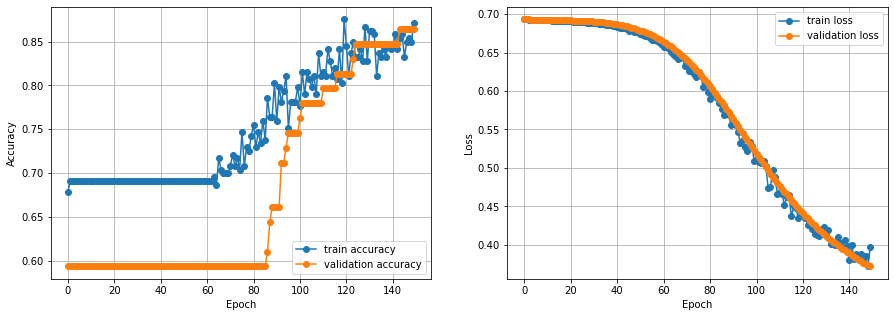

In [34]:
h=history
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [35]:
y_test.drop("prediction", axis=1, inplace=True)
#y_test


C:\Users\shomy\anaconda3\envs\cvpr\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

3/3 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.9324

Test Accuracy: 0.9324324131011963

Test Loss: 0.3028940260410309


In [37]:
m1=model.predict(x_test)
ndf = pd.DataFrame(yy_test)
# Using DataFrame.insert() to add a column
ndf.insert(0, "prediction",m1, True)
ndf.columns

Index(['prediction', 'observedRainfallcatagorical'], dtype='object')

In [38]:
ndf.rename(columns = { 0:'Actual value'}, inplace = True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

pd.set_option('display.max_colwidth',0)  

# Observe the result
print(ndf)

     prediction  observedRainfallcatagorical
247  0.930520    1.0                        
127  0.876280    1.0                        
230  0.951466    1.0                        
162  0.937353    1.0                        
159  0.914340    1.0                        
296  0.767524    0.0                        
208  0.947348    1.0                        
146  0.923936    1.0                        
277  0.899191    1.0                        
5    0.395937    0.0                        
357  0.415014    0.0                        
342  0.426029    0.0                        
65   0.451970    0.0                        
271  0.937304    1.0                        
188  0.942483    1.0                        
102  0.831391    1.0                        
249  0.933107    1.0                        
311  0.486776    0.0                        
327  0.447769    0.0                        
250  0.946662    1.0                        
106  0.842170    1.0                        
270  0.932

## Linear Regression

In [39]:
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(x_train, y_train)
  

 

LinearRegression()

In [40]:
# regression coefficients
print('Coefficients: ', reg.coef_)
y_test.drop("prediction", axis=1, inplace=True)  

print('Variance score: {}'.format(reg.score(x_test, y_test[['observedRainfallcatagorical']])))

Coefficients:  [[-0.07789749  0.35497258  0.06642763  0.08768912]]
Variance score: 0.7114916088038657


C:\Users\shomy\anaconda3\envs\cvpr\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
m=reg.predict(x_test)

pdf = pd.DataFrame(yy_test)
# Using DataFrame.insert() to add a column
pdf.insert(0, "Linear prediction",m, True)
pdf.columns


Index(['Linear prediction', 'observedRainfallcatagorical'], dtype='object')

In [42]:
pdf.rename(columns = { 0:'Actual value'}, inplace = True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

pd.set_option('display.max_colwidth',0)  

# Observe the result
#print(pdf)

In [43]:
print('Variance score: {}'.format(reg.score(x_test, y_test[['observedRainfallcatagorical']])))
print('Linear regression r2 score : %.4f '  %  r2_score(y_test[['observedRainfallcatagorical']], m))
print( 'Error : %.4f ' % np.sqrt(mean_squared_error(y_test[['observedRainfallcatagorical']],m))) 

Variance score: 0.7114916088038657
Linear regression r2 score : 0.7115 
Error : 0.2564 


In [44]:
# prepare the cross-validation procedure
cv2 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(reg,x_test,y_test[['observedRainfallcatagorical']], scoring='r2', cv=cv2, n_jobs=1)
# report performance
print('Linear cross_val_score mean: %.3f std: (%.3f)' % (mean(scores), std(scores)))

Linear cross_val_score mean: 0.656 std: (0.205)


## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, yTrain) 
y_predi= classifier.predict(x_test) 

In [46]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(classifier,x_test,y_test[['observedRainfallcatagorical']], scoring='r2', cv=cv, n_jobs=-1)
scores1 = cross_val_score(classifier,x_test,y_test[['observedRainfallcatagorical']], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Logistic cross_val_score: %.3f std: (%.3f)' % (mean(scores), std(scores)))
print('Logistic cross_val_score(accuracy): %.3f std: (%.3f)' % (mean(scores1), std(scores1)))

Logistic cross_val_score: 0.669 std: (0.435)
Logistic cross_val_score(accuracy): 0.934 std: (0.087)


In [47]:
y_true=y_test[['observedRainfallcatagorical']]
 

In [48]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_predi,y_true)  
cm

array([[23,  1],
       [ 3, 47]], dtype=int64)

In [49]:
ldf = pd.DataFrame(yy_test)
# Using DataFrame.insert() to add a column
ldf.insert(0, "Logistic prediction",y_predi, True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

pd.set_option('display.max_colwidth',0) 

# Observe the result
#print(ldf)

In [50]:
print('Variance score: {}'.format(classifier.score(x_test, y_test[['observedRainfallcatagorical']])))

print('Logistic regression score : %.4f '  %  r2_score(y_test[['observedRainfallcatagorical']],y_predi))
print( 'Error : %.4f ' % np.sqrt(mean_squared_error(y_test[['observedRainfallcatagorical']],y_predi))) 

Variance score: 0.9459459459459459
Logistic regression score : 0.7628 
Error : 0.2325 


## Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=1.0,normalize=True)
rid.fit(x_train,yTrain)
y_predr = rid.predict(x_test)

In [52]:
#yy_test

In [53]:
rdf = pd.DataFrame(yy_test)
# Using DataFrame.insert() to add a column
rdf.insert(0, "Ridge prediction",y_predr, True)

pd.set_option('display.max_columns',5)
pd.set_option('display.max_rows', None) 

pd.set_option('display.max_colwidth',0) 

# Observe the result
rdf

,Ridge prediction,Logistic prediction,Linear prediction,observedRainfallcatagorical
247,0.885782,1.0,1.018374,1.0
127,0.789305,1.0,0.784338,1.0
230,0.930613,1.0,1.074986,1.0
162,0.892635,1.0,0.956814,1.0
159,0.853699,1.0,0.898985,1.0
296,0.705594,1.0,0.695405,0.0
208,0.916602,1.0,1.078966,1.0
146,0.864714,1.0,0.937264,1.0
277,0.832538,1.0,0.900730,1.0
5,0.252690,0.0,0.095943,0.0


In [54]:
# define model evaluation method
#the average MAE across the three repeats of 10-fold cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rid,x_train,yTrain, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f std: (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.286 std: (0.039)


In [55]:
print('Variance score: {}'.format(rid.score(x_test, y_test[['observedRainfallcatagorical']])))

print('Ridge regression score : %.4f '  %  r2_score(y_test[['observedRainfallcatagorical']],y_predr))
print( 'Error : %.4f ' % np.sqrt(mean_squared_error(y_test[['observedRainfallcatagorical']],y_predr))) 

Variance score: 0.5916049995146753
Ridge regression score : 0.5916 
Error : 0.3051 


In [56]:
# prepare the cross-validation procedure
cv1 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(rid,x_test,y_test[['observedRainfallcatagorical']], scoring='r2', cv=cv1, n_jobs=1)
# report performance
scores


array([0.85442836, 0.53907703, 0.74009329, 0.65723426, 0.47627915,
       0.68937707, 0.7239389 , 0.33676718, 0.34353019, 0.56520316])

In [57]:
print('Ridge cross_val_score mean: %.3f std: (%.3f)' % (mean(scores), std(scores)))

Ridge cross_val_score mean: 0.593 std: (0.163)
